In [158]:
#import necessary modules

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [159]:
#read the dataset

df = pd.read_csv('biggy.csv') # Load the dataset

In [160]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [161]:
df.shape

(1460, 81)

In [162]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [163]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [164]:
# Preprocessing: drop columns with too many missing values and fill remaining missing values , the columns we are going to drop means they won't appear again
df = df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
df = df.fillna(df.mean())


C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_12472\950882849.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [165]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [166]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df)


In [167]:
corr = df.corr()

high_corr_features = corr.index[abs(corr['SalePrice']) > 0.5] 
print(f'Highly Corrolated Features:\n', high_corr_features, '\n') 
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'KitchenQual_TA'],
      dtype='object') 

No. of Highly Corrolated Features: 15


Text(145.58159722222223, 0.5, 'Features')

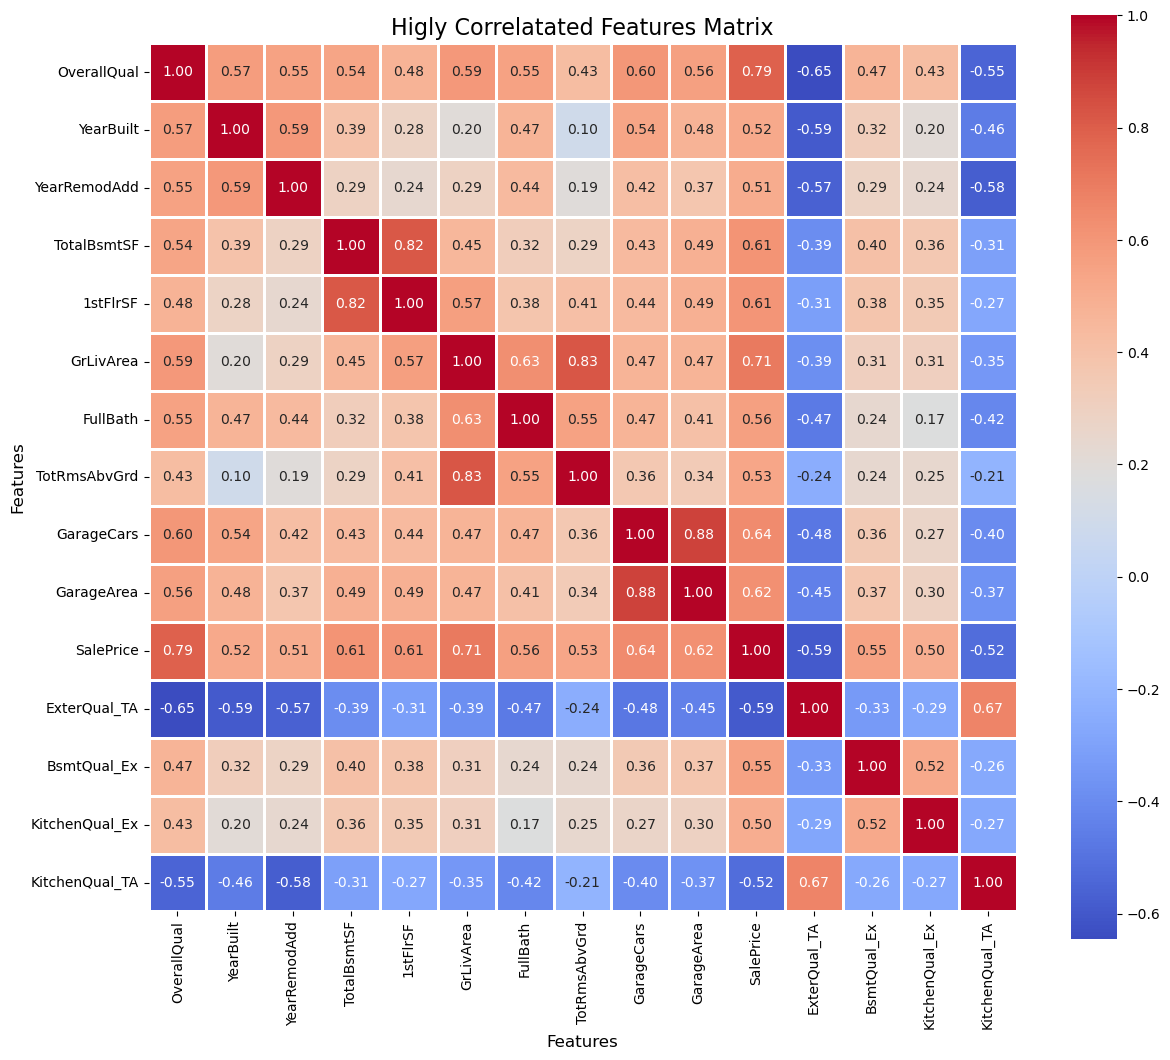

In [168]:
plt.figure(figsize=(14,12))   
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True, linewidths=2)

plt.title('Higly Correlatated Features Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

In [169]:
corr = df.corr()

high_corr_features = corr.index[abs(corr['SalePrice']) > 0.52] 
print(f'Highly Corrolated Features:\n', high_corr_features, '\n') 
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice',
       'ExterQual_TA', 'BsmtQual_Ex'],
      dtype='object') 

No. of Highly Corrolated Features: 12


In [170]:
X = df[high_corr_features.drop('SalePrice')] 
y = df[['SalePrice']] 

In [175]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ss=StandardScaler()
ss_x_train=ss.fit_transform(X_train)
ss_x_test=ss.transform(X_test)

In [176]:
# Create a linear regression model and fit it to the training data
model = RandomForestRegressor(random_state=0)
model.fit(ss_x_train, y_train)

C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_12472\805174911.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(ss_x_train, y_train)


RandomForestRegressor(random_state=0)

In [173]:
# Make predictions on the testing data
y_pred = model.predict(ss_x_test)

In [174]:
# Evaluate the model using the mean squared error metric
#Testing the model accuracy with different paramtes
print("r2   = ",r2_score(y_test, y_pred))             # Getting the R-squared (R²)
print("mae  = ",mean_absolute_error(y_test, y_pred))  # Getting the Mean Absolute Error
print("mse  = ",mean_squared_error(y_test, y_pred))   # Getting the Mean Squared Error
print("rmse = ",np.sqrt(mse))                       # Getting the Root Mean Squared Error

r2   =  0.8848277297280591
mae  =  19261.43081869329
mse  =  883408883.0081064
rmse =  45409.309910621756
